# Projeto Web Shooter — Spider-Man

<p  style='font-size: 20px;'><b>Conceito utilizado:</b> Coil Gun</p>

<p  style='font-size: 20px;'><b>Grupo:</b></p>
<ul>
    <li>Hélio Neto</li>
    <li>João Pedro Meirelles</li>
    <li>Pedro Fontes</li>
    <li>Rafael Almada</li>
</ul>
<hr>
Utilizando o que aprendemos em aula, foi possível abstrair a <i>$4^{a}$ Lei de Maxwell</i>, conhecida também como <i>Lei de Ampère</i>, 

$$\oint{\vec{B}\cdot{d\vec{s}}} = \mu_{0}\cdot{\left(i + \epsilon_{0}\cdot{\frac{d\phi_{E}}{dt}}\right)}$$

e chegamos a seguinte equação:

$$\vec{B}(x) = \frac{\mu_{0}\cdot{N}\cdot{i}\cdot{r^{2}}}{2\cdot{(x^2+r^2)^{\frac{3}{2}}}}$$

Pensando que o campo magnético é calculado dentro de uma bobina.

<b style='font-size: 20px;'>Dimensões:</b>

<ul>
    <li><b>Largura do Coil</b>: 7 cm</li>
    <li><b>Diâmetro do Coil</b>: 1.5 cm</li>
    <li><b>Diâmetro do projétil</b>: 1.28 cm</li>
</ul>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""
Algumas variáveis globais
"""
global mu0
mu0 = 4*math.pi*1e-7

In [3]:
def magneticField(N, i, r, x):
    """
    Função que calcula o campo magnético ao longo da espira
    N: Número de voltas da bobina
    i: Corrente DC circulando na bobina
    r: Raio da bobina
    x: Posição em x da bobina
    """
    B = (mu0*N*i*(r**2))/(2*((x)**2+(r)**2)**(3/2))
    return B

In [4]:
N = 480 # voltas
i = 3 # A
r = (1.5/2)*1e-2 # m 
x1 = np.arange(-0.035, 0, 0.0001)
x2 = np.arange(-0.035, 0.035, 0.0001)

In [5]:
def listOfB(x):
    listOfB = []
    for i in range(len(x)):
        listOfB.append(magneticField(N, i, r, x[i]))
    return listOfB

B2 = listOfB(x2)
B1 = listOfB(x1)

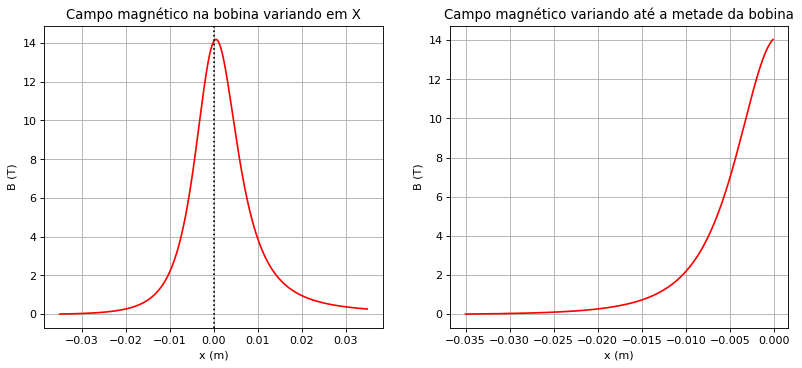

In [15]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(x2, B2, '-r')
plt.title('Campo magnético na bobina variando em X')
plt.xlabel('x (m)')
plt.ylabel('B (T)')
plt.axvline(x = 0, color='#000000', ls=':')
plt.grid()

plt.subplot(122)
plt.plot(x1, B1, '-r')
plt.title('Campo magnético variando até a metade da bobina')
plt.xlabel('x (m)')
plt.ylabel('B (T)')
plt.grid()


plt.show()

<hr>
Agora para adquirir a velocidade do projétil:

Primeiramente temos que a <i>$2^a$ Lei de Newton</i> é:

$$\vec{F_{R}} = m \cdot{\vec{a}}$$

e, dado que:

$$\vec{a} = \frac{d^{2}x}{dt^{2}}$$

Logo, ao integrar ambos os lados, teremos:

$$\int{\vec{F}\cdot{d\vec{s}}} = \int{m\cdot{\frac{d^{2}x}{dt^{2}}}\cdot{d\vec{s}}}$$

Dado que:

$$\vec{v} = \frac{dx}{dt}$$

Temos:

$$\vec{v} = \left(\frac{\int{\vec{F}(x)\cdot{dx}}}{m}\right)$$

**Mas ainda há um problema:** Ainda não sabemos quem é a força magnética.
Para descobri-lá, iremos dizer que a força será igual ao campo magnético em determinado ponto, multiplicado a uma constante:

$$\vec{F}(x) = k\cdot{\vec{B}(x)}$$

Para descobrir o valor de <i>k</i>, precisamos experimentalmente medir o valor de $\vec{F}$ em algum ponto e, dado $\vec{B}$ no ponto, temos:

$$k = \frac{\vec{F}(x)}{\vec{B}(x)}$$

In [7]:
def magneticForce(B, x, k):
    """
    Retorna a força magnética em determinado ponto do eixo x
    """
    F = k*B
    return F

In [18]:
def plotMagForce(x, k, color):
    F = []
    for i in x:
        B = magneticField(N, i, r, i)
        F.append(magneticForce(B, x, k))
    plt.plot(x, F, color)
    plt.xlabel('x (m)')
    plt.ylabel('F (N)')
    plt.title('Força ao longo da distância percorrida na bobina')
    plt.grid()

Iremos simular a bobina com diversos valores para <i>k</i>

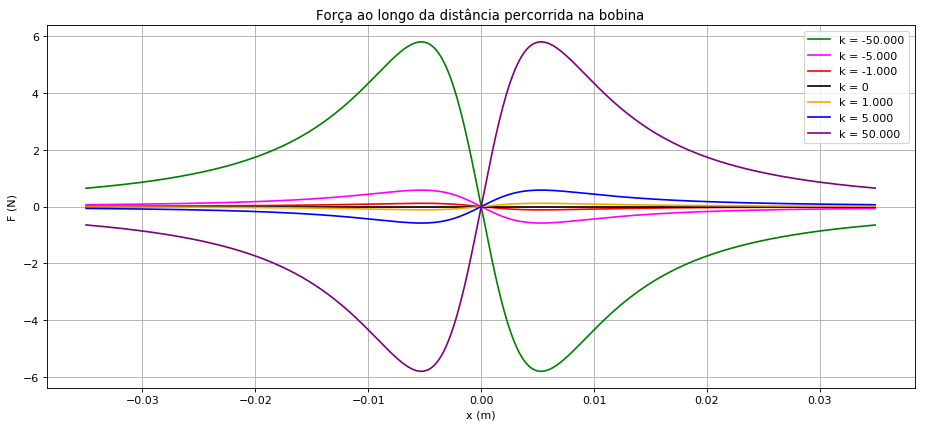

In [24]:
plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
plotMagForce(x2, -50000, 'green')
plotMagForce(x2, -5000, 'magenta')
plotMagForce(x2, -1000, 'red')
plotMagForce(x2, 0, '#000000')
plotMagForce(x2, 1000, 'orange')
plotMagForce(x2, 5000, 'blue')
plotMagForce(x2, 50000, 'purple')
legenda = ['k = -50.000', 'k = -5.000', 'k = -1.000', 'k = 0', 'k = 1.000', 'k = 5.000', 'k = 50.000']
plt.legend(legenda)
plt.show()

Para adquirir um gráfico de <i>Velocidade</i> pelo <i>Tempo</i>, iremos voltar a seguinte equação:

$$\frac{dx}{dt} = \vec{v} = \left(\frac{\int{\vec{F}(x)\cdot{dx}}}{m}\right)$$

Para isso, multiplicaremos o valor da força por um $\Delta X$

In [10]:
delta_x = 0.0001
m = (001.27*003.5*001.27)*(7.874*1e-3/(1e-2))

def getSpeeds(x, delta_x, k):
    v = []
    for i in range(len(x)):
        B = magneticField(N, i, r, x[i])
        F = magneticForce(B, x[i], k)
        v.append((F*delta_x)/m)
    return v

print(f'm = {m} g')

m = 4.444991109999999 g


In [11]:
k = 5000
v1 = getSpeeds(x1, delta_x, k)
v2 = getSpeeds(x2, delta_x, k)
t1 = np.arange(0, 0.035, 0.0001)
t2 = np.arange(0, 0.07, 0.0001)

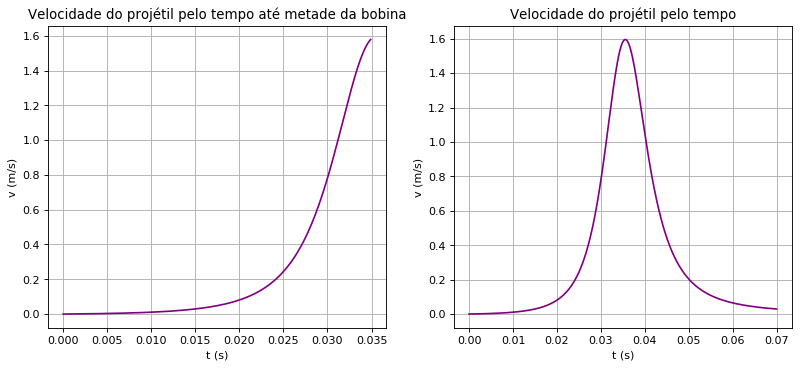

In [16]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(121)
plt.plot(t1, v1, 'purple')
plt.title('Velocidade do projétil pelo tempo até metade da bobina')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.grid()

plt.subplot(122)
plt.plot(t2, v2, 'purple')
plt.title('Velocidade do projétil pelo tempo')
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.grid()


plt.show()